In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### 03 - Keypoints analyseren en verrijken
De gedetecteerde keypoints zullen ten eerste geanalyseerd worden: zijn er verbanden te vinden tussen de keypoints en poses?
Daarnaast zal de data verrijkt worden met bijvoorbeeld verhoudingen en afstanden tussen bepaalde keypoints, denk aan de afstand tussen de handen (belangrijk bij de goddess) of de verticale afstand tussen de handen en voeten (belangrijk bij de downdog en plank).

#### Toelichting data
Elke pose bevat 17 coördinaten. De betekenis van elke 'keypoint' is als volgt:
- 0: nose
- 1: left_eye
- 2: right_eye
- 3: left_ear
- 4: right_ear
- 5: left_shoulder
- 6: right_shoulder
- 7: left_elbow
- 8: right_elbow
- 9: left_wrist
- 10: right_wrist
- 11: left_hip
- 12: right_hip
- 13: left_knee
- 14: right_knee
- 15: left_ankle
- 16: right_ankle

In [23]:
keypoints_train_df = pd.read_csv('analytics_df_train_YOLOv8m.csv', index_col=0, header=0)
#keypoints_train_df = pd.read_csv('analytics_df_train_YOLOv8n.csv', index_col=0, header=0)
keypoints_train_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,v07,v08,v09,v10,v11`,v12,v13,v14,v15,v16
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.934024,0.423500,0.709093,0.402510,0.702865,0.427802,0.704759,...,0.894155,0.382929,0.755484,0.354968,0.907737,0.803783,0.931804,0.862971,0.845818,0.790219
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.932599,0.336725,0.687173,0.331049,0.671780,0.337968,0.669529,...,0.965029,0.357695,0.892507,0.361047,0.975111,0.919065,0.982019,0.940688,0.942040,0.897956
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.936376,0.379543,0.704821,0.363566,0.690626,0.378991,0.699057,...,0.974668,0.532774,0.912505,0.514585,0.983160,0.951374,0.973470,0.924674,0.896926,0.840897
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.933815,0.616935,0.697705,0.620064,0.689498,0.625734,0.677587,...,0.535995,0.935047,0.491464,0.834952,0.922209,0.965877,0.929677,0.967766,0.868041,0.914164
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.898250,0.454746,0.786763,0.441597,0.773290,0.450748,0.781609,...,0.968830,0.831268,0.926077,0.803155,0.953238,0.920872,0.877395,0.816905,0.630279,0.528475


In [3]:
keypoints_train_df.describe()

,pose_code,confidence,x00,y00,x01,y01,x02,y02,x03,y03,...,v07,v08,v09,v10,v11`,v12,v13,v14,v15,v16
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,...,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,2.162826,0.923619,0.499879,0.382968,0.504989,0.369197,0.494267,0.369510,0.512924,0.367405,...,0.910639,0.909264,0.875883,0.873084,0.977130,0.977831,0.957045,0.957148,0.883649,0.884501
std,1.477328,0.044237,0.171308,0.186119,0.174120,0.189743,0.173934,0.189111,0.164837,0.175155,...,0.149581,0.145025,0.163721,0.161144,0.060359,0.062232,0.078648,0.080000,0.118875,0.119087
min,0.000000,0.510987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.080933,0.083619,0.087593,0.065464,0.319662,0.235476,0.050035,0.062874,0.010713,0.012053
25%,1.000000,0.922200,0.424941,0.234902,0.427935,0.220581,0.424019,0.219760,0.432988,0.224063,...,0.920327,0.910104,0.849897,0.837762,0.982665,0.981826,0.955697,0.955924,0.856925,0.856939
50%,2.000000,0.934126,0.500138,0.347976,0.511092,0.335106,0.488431,0.335614,0.525310,0.341925,...,0.975803,0.974240,0.947969,0.943790,0.994681,0.994814,0.978811,0.977894,0.915042,0.914973
75%,4.000000,0.942225,0.573314,0.522487,0.576533,0.507479,0.567855,0.507638,0.586422,0.497264,...,0.990651,0.989886,0.979874,0.979657,0.998060,0.998156,0.989991,0.990228,0.951619,0.951218
max,5.000000,0.967555,1.000000,0.823384,1.000000,0.816793,1.000000,0.831975,1.000000,0.788566,...,0.999185,0.999587,0.998256,0.997553,0.999835,0.999870,0.999649,0.999701,0.996397,0.997492


#### Stap 1. Keypoints analyseren

Eerst visualiseren

In [4]:
x_coordinates_cols = ['x00', 'x01', 'x02', 'x03', 'x04', 'x05','x06', 'x07', 'x08', 'x09', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']
y_coordinates_cols = ['y00', 'y01', 'y02', 'y03', 'y04', 'y05','y06', 'y07', 'y08', 'y09', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16']

x_coordinates_dict = {'x00': 'nose',
                      'x01': 'left_eye',
                      'x02': 'right_eye',
                      'x03': 'left_ear',
                      'x04': 'right_ear',
                      'x05': 'left_shoulder',
                      'x06': 'right_shoulder',
                      'x07': 'left_elbow',
                      'x08': 'right_elbow',
                      'x09': 'left_wrist',
                      'x10': 'right_wrist',
                      'x11': 'left_hip',
                      'x12': 'right_hip',
                      'x13': 'left_knee',
                      'x14': 'right_knee',
                      'x15': 'left_ankle',
                      'x16': 'right_ankle'}

y_coordinates_dict = {'y00': 'nose',
                      'y01': 'left_eye',
                      'y02': 'right_eye',
                      'y03': 'left_ear',
                      'y04': 'right_ear',
                      'y05': 'left_shoulder',
                      'y06': 'right_shoulder',
                      'y07': 'left_elbow',
                      'y08': 'right_elbow',
                      'y09': 'left_wrist',
                      'y10': 'right_wrist',
                      'y11': 'left_hip',
                      'y12': 'right_hip',
                      'y13': 'left_knee',
                      'y14': 'right_knee',
                      'y15': 'left_ankle',
                      'y16': 'right_ankle'}

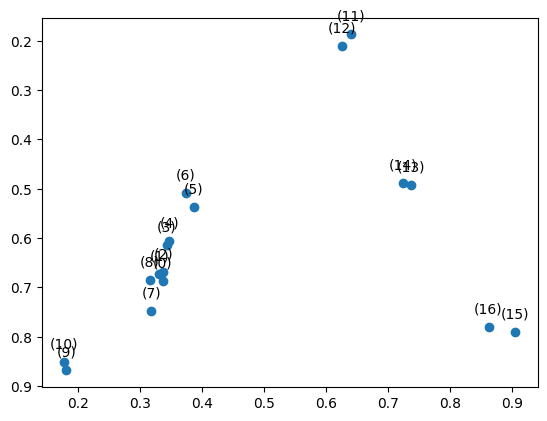

In [5]:
# Visualisatie van de keypoints
row = 1

coordinate_number = np.arange(0, 17, 1)

x_coordinates = np.zeros(17)
counter = 0
for x in x_coordinates_cols:
    x_coordinates[counter] = keypoints_train_df.iloc[row][x]
    counter += 1
x_coordinates

y_coordinates = np.zeros(17)
counter = 0
for y in y_coordinates_cols:
    y_coordinates[counter] = keypoints_train_df.iloc[row][y]
    counter += 1
y_coordinates

plt.scatter(x_coordinates, y_coordinates)

for x,y,z in zip(x_coordinates, y_coordinates, coordinate_number):

    label = f"({z})"
    plt.gca().invert_yaxis()
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

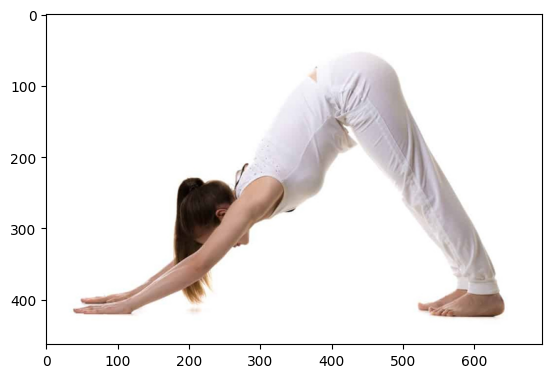

In [6]:
image = Image.open(keypoints_train_df.iloc[row]['path']).convert('RGB')
plt.imshow(image)

Zoeken naar verbanden / clusters van keypoints voor elk van de poses m.b.v. boxplots en scatterplots

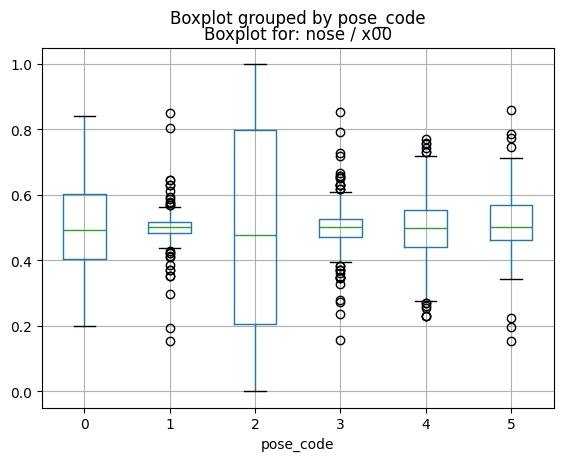

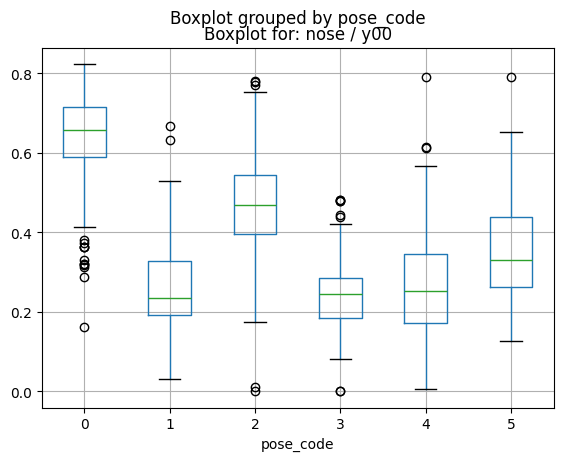

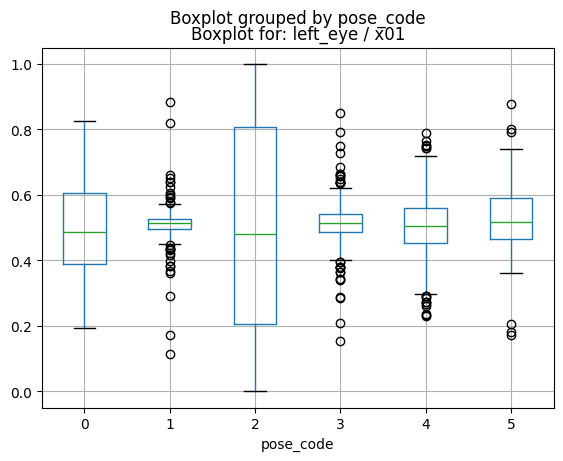

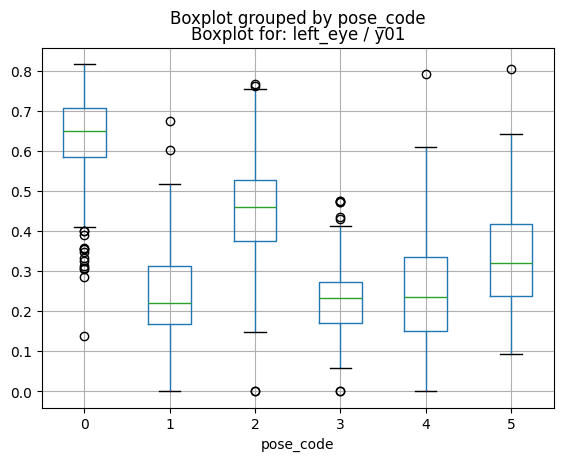

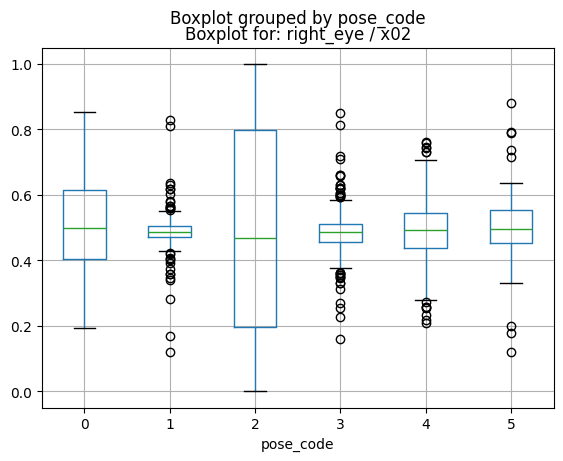

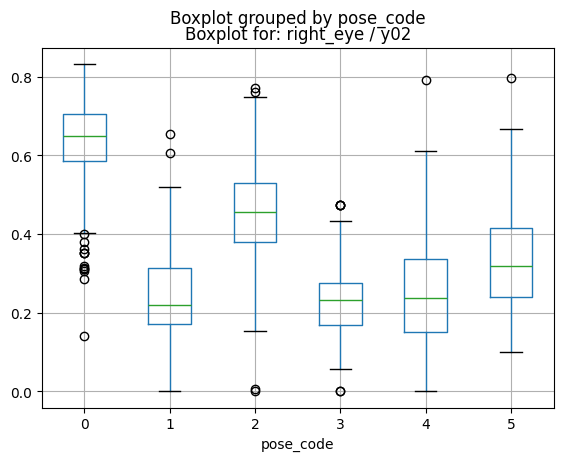

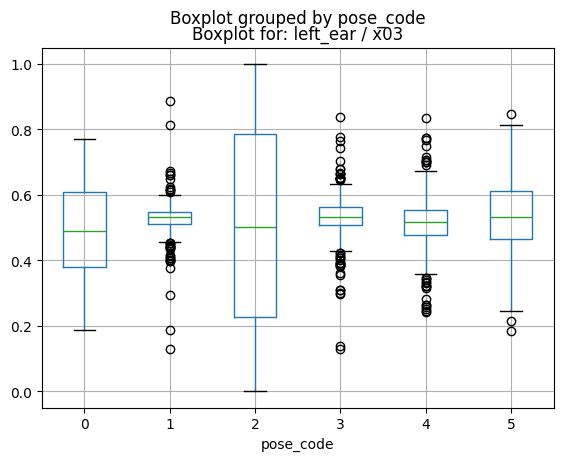

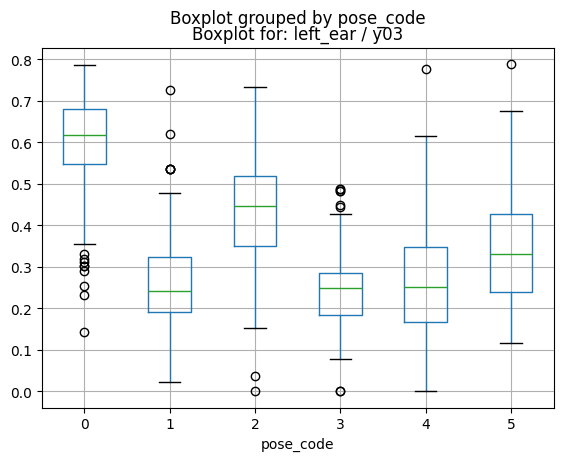

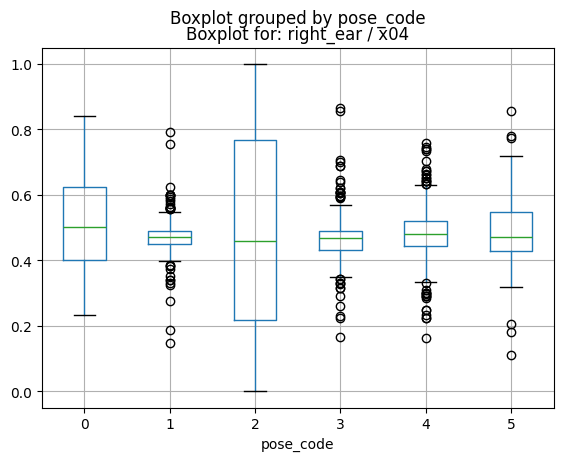

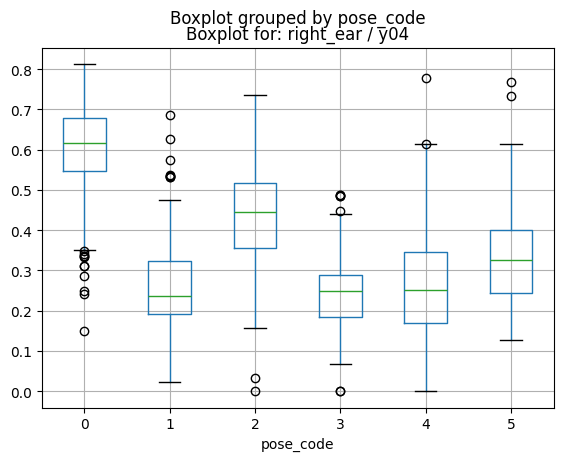

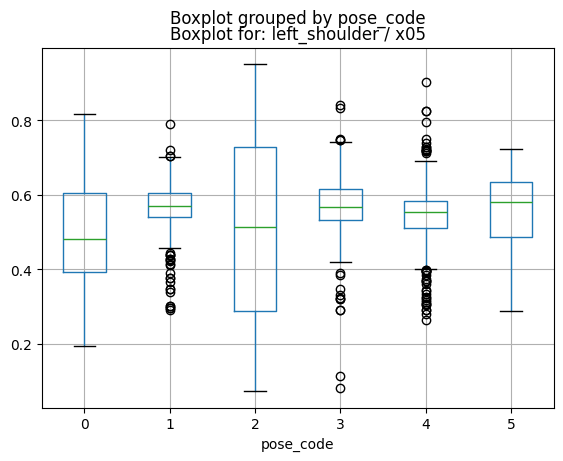

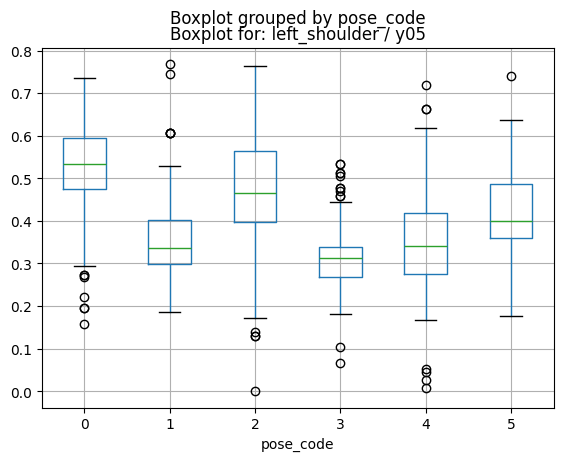

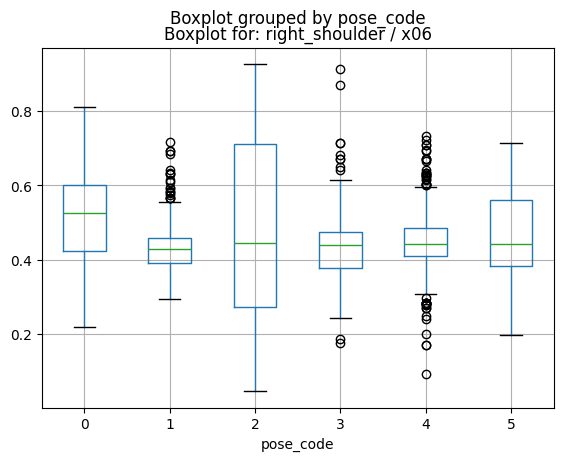

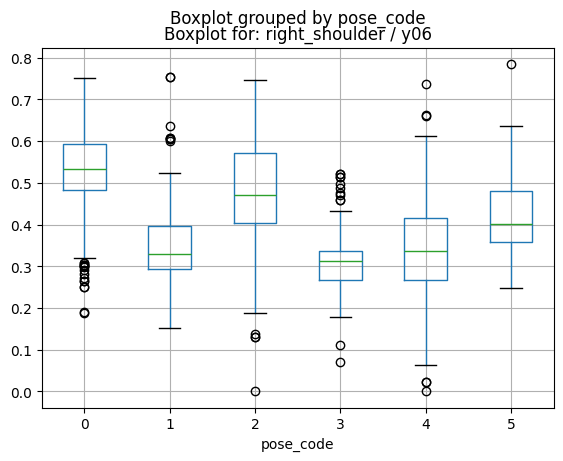

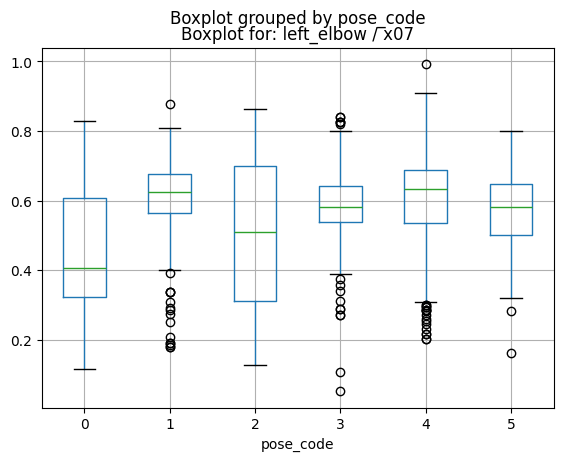

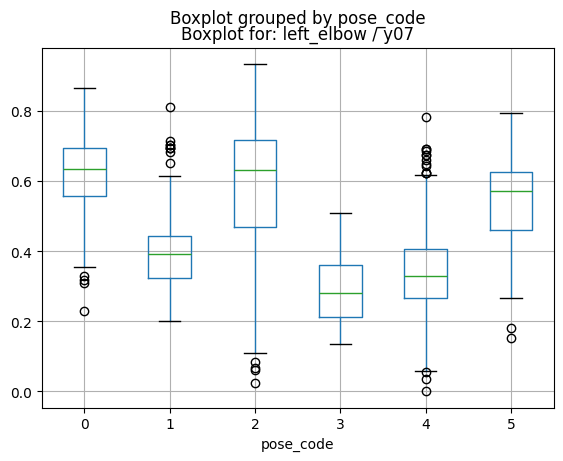

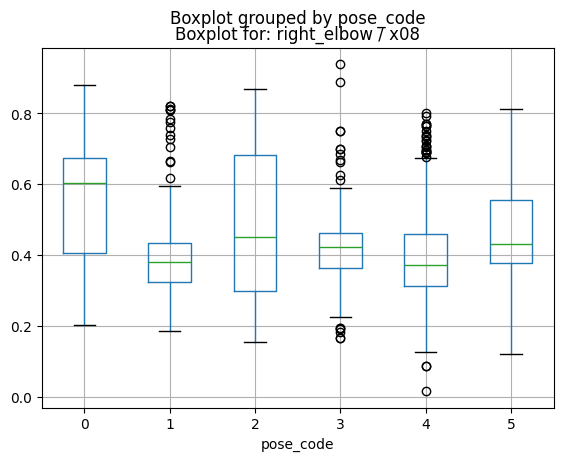

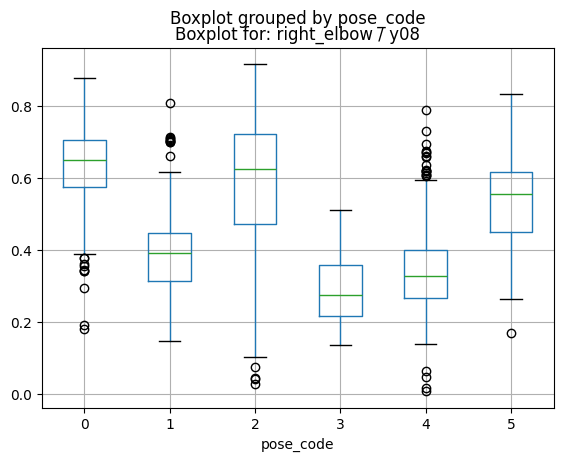

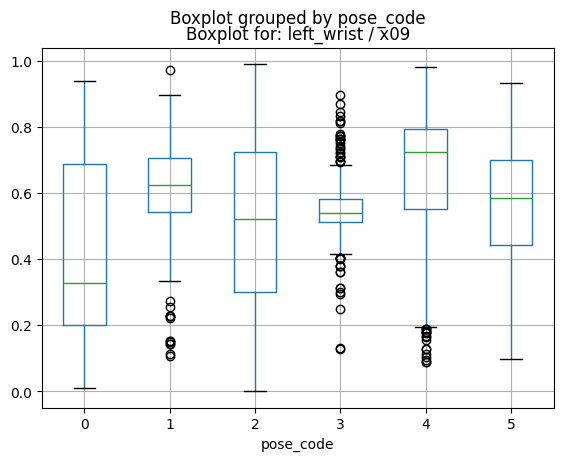

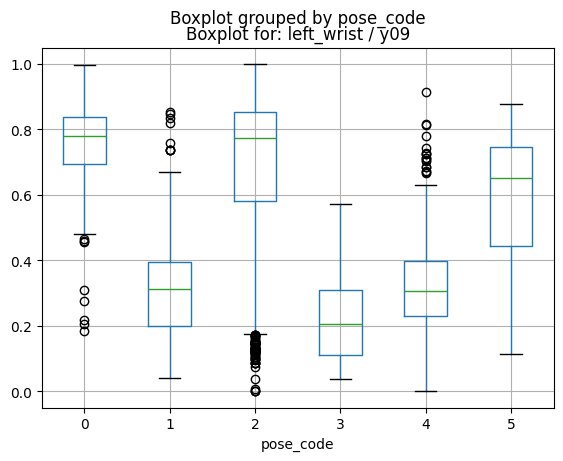

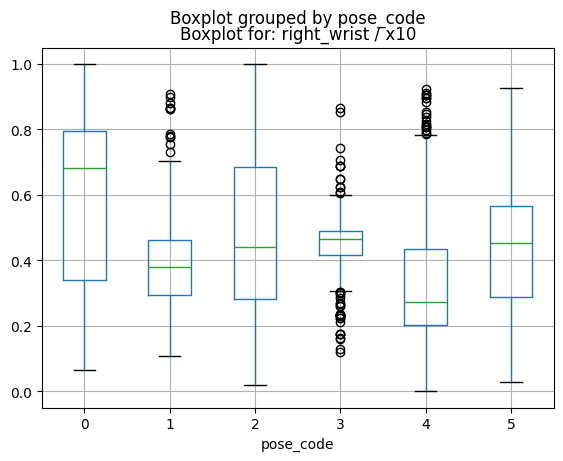

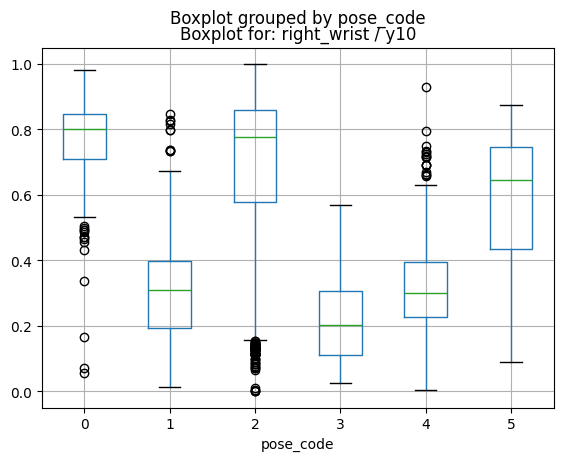

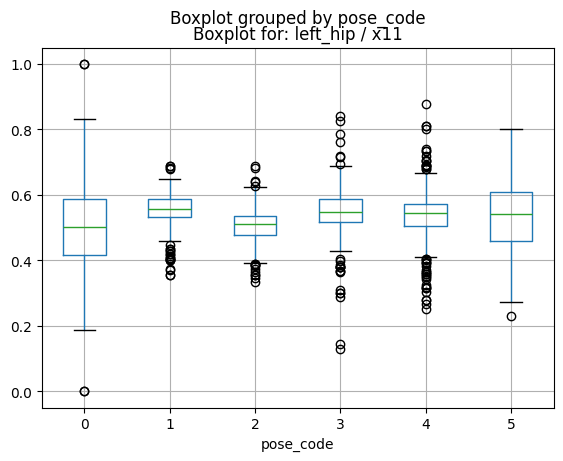

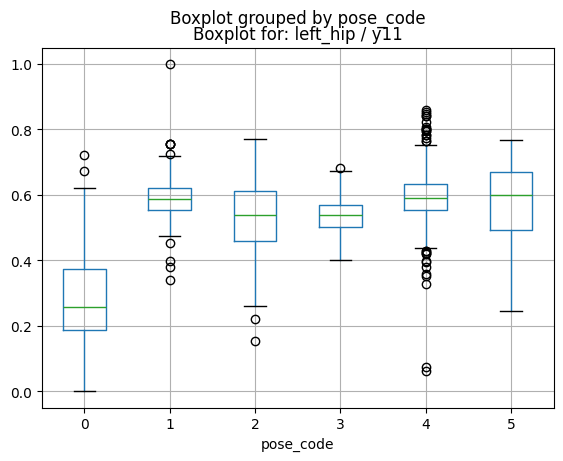

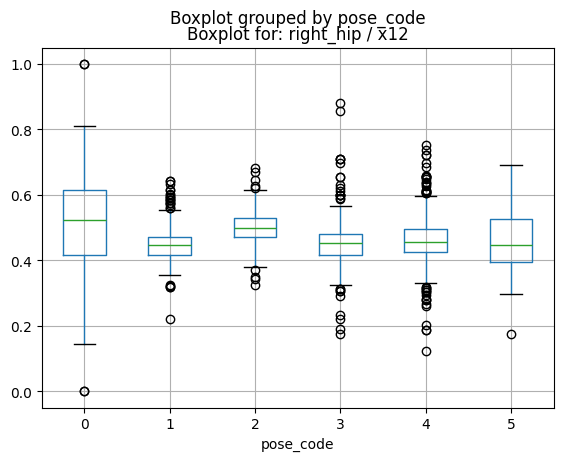

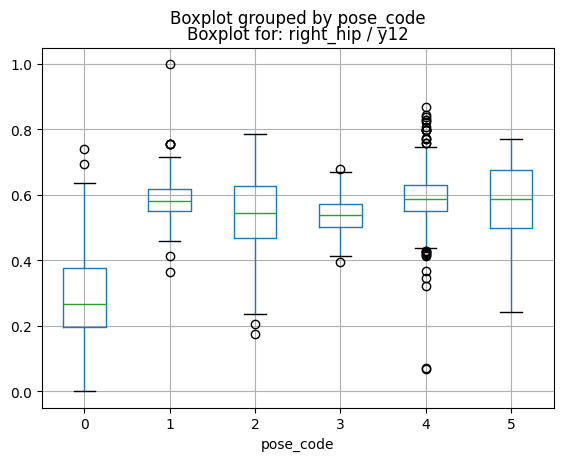

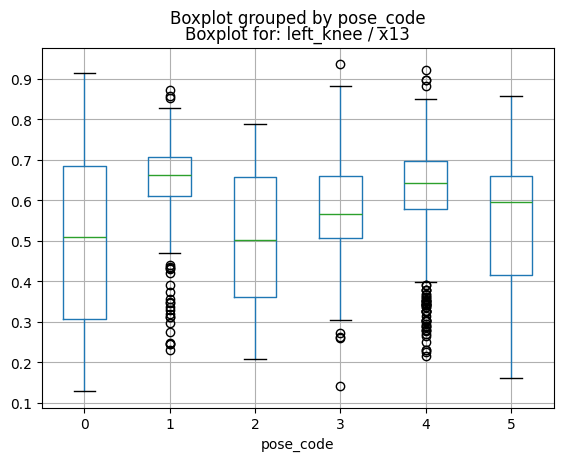

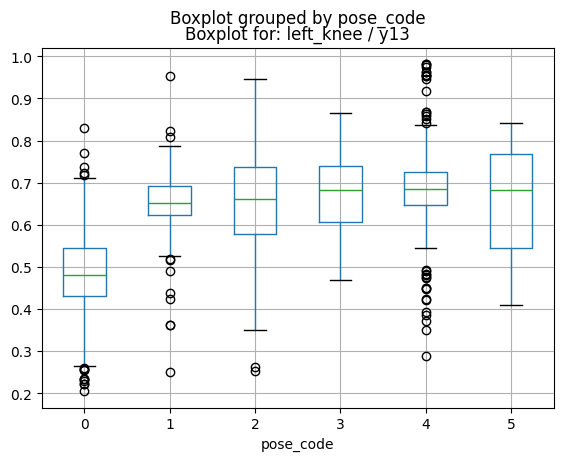

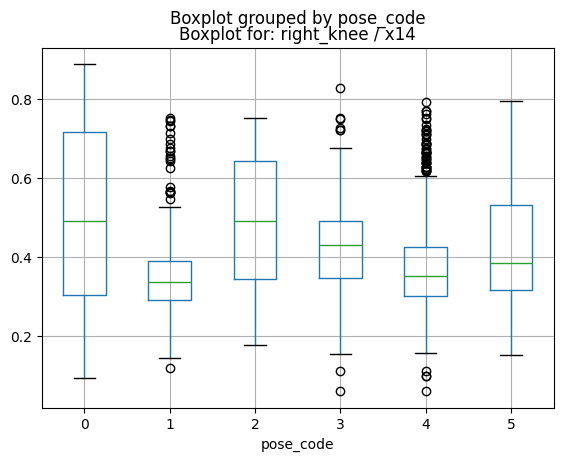

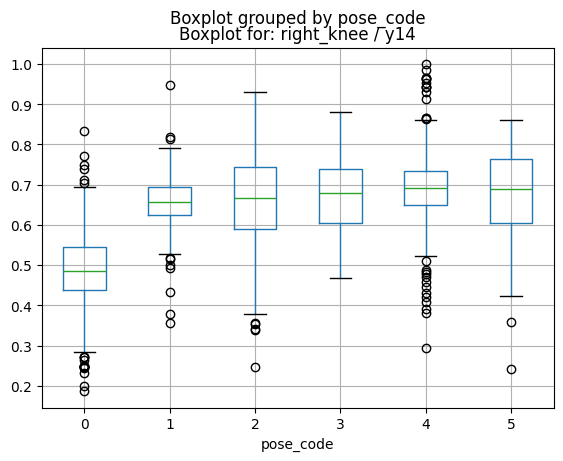

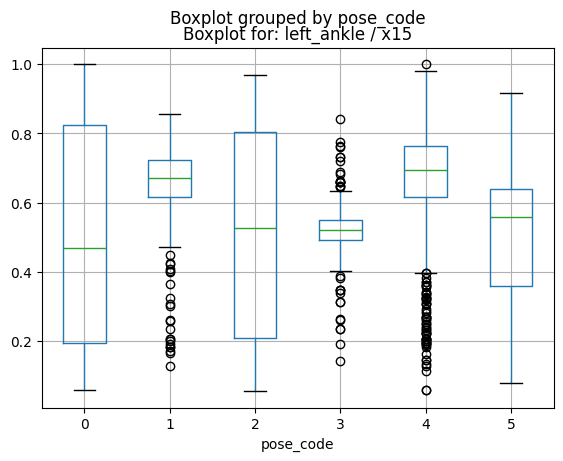

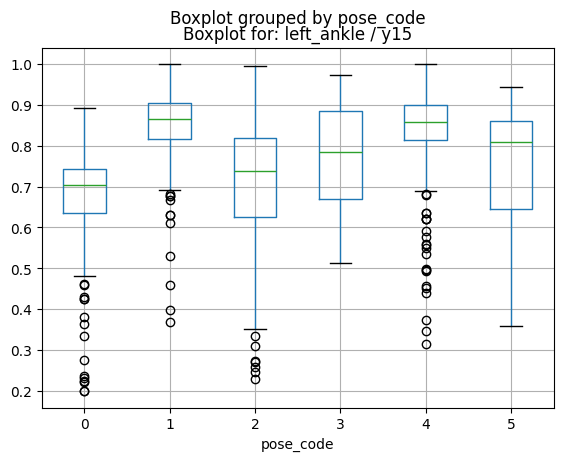

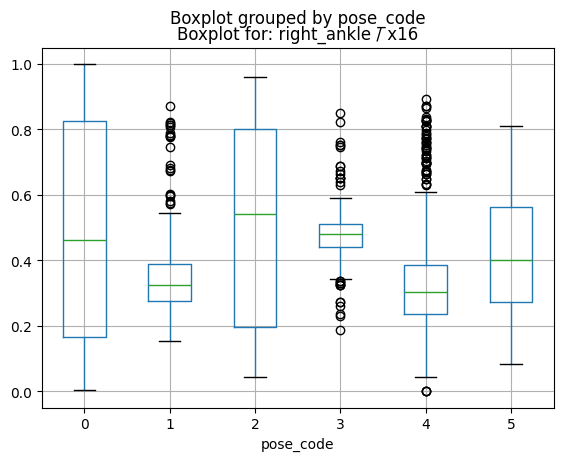

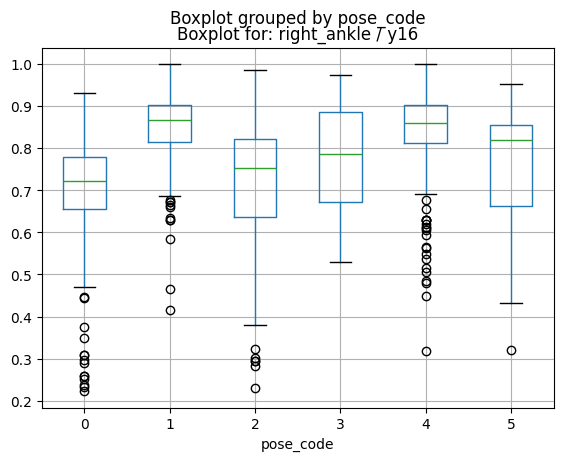

In [7]:
for i in range(0, len(x_coordinates_cols), 1):
    keypoints_train_df.boxplot(column=x_coordinates_cols[i], by='pose_code')
    plt.title('Boxplot for: ' + x_coordinates_dict[x_coordinates_cols[i]] + ' / ' + x_coordinates_cols[i])
    plt.show()
    keypoints_train_df.boxplot(column=y_coordinates_cols[i], by='pose_code')
    plt.title('Boxplot for: ' + y_coordinates_dict[y_coordinates_cols[i]] + ' / ' + y_coordinates_cols[i])
    plt.show()



#keypoint_columns = keypoints_train_df.columns[4:38]
#for col in keypoint_columns:
#    keypoints_train_df.groupby('1').boxplot(column=col)

Scatterplots

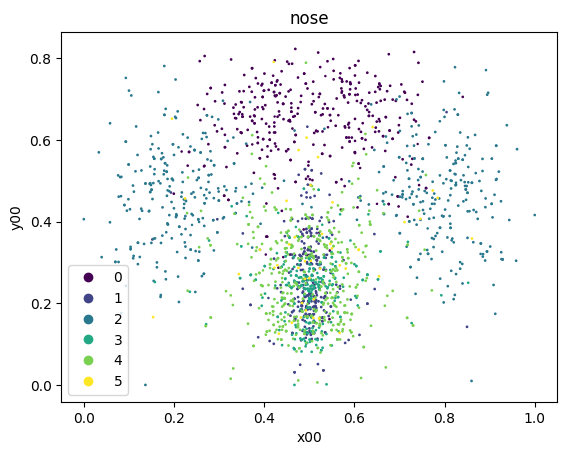

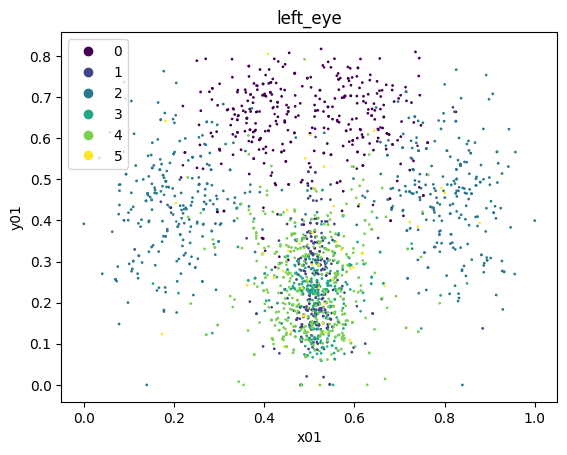

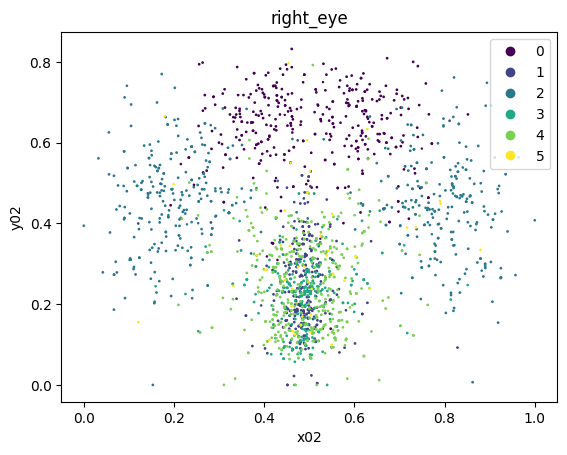

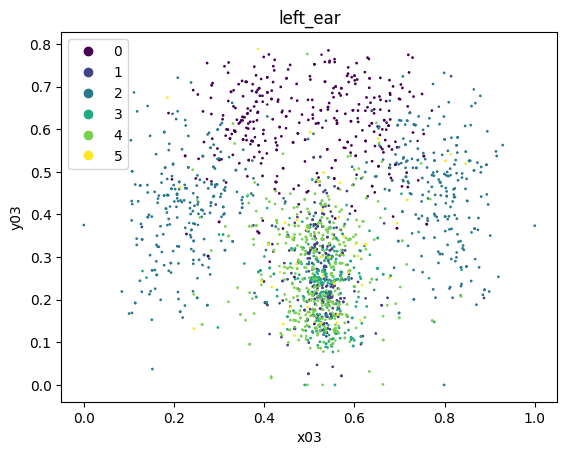

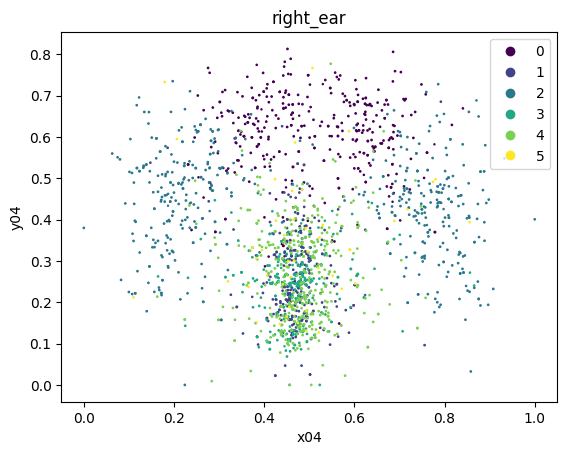

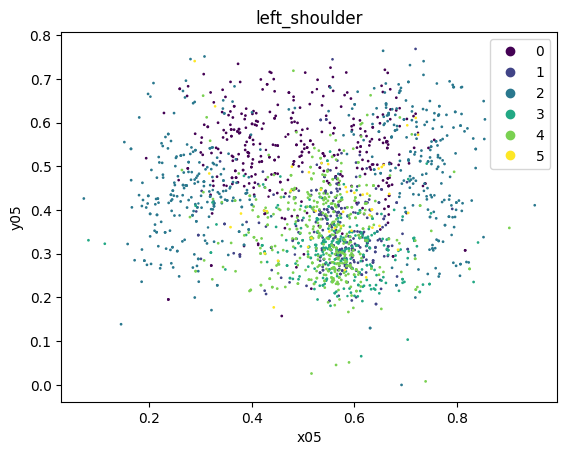

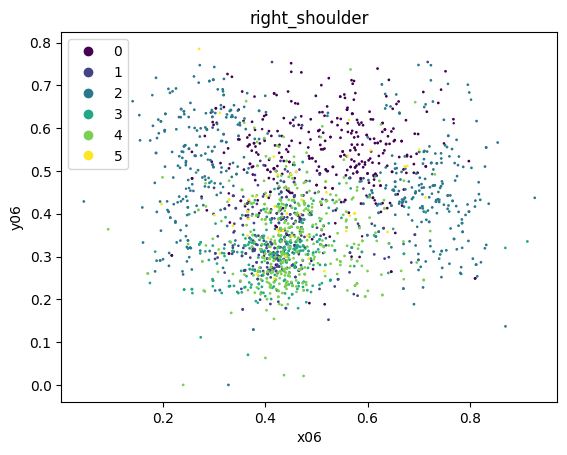

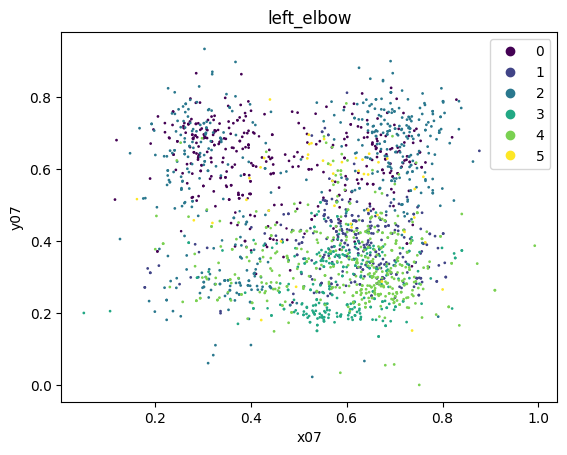

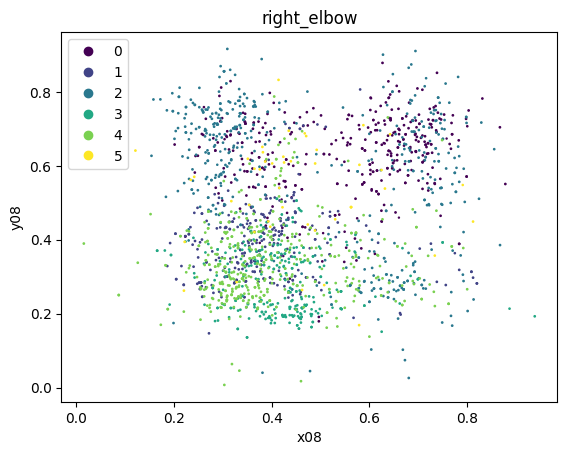

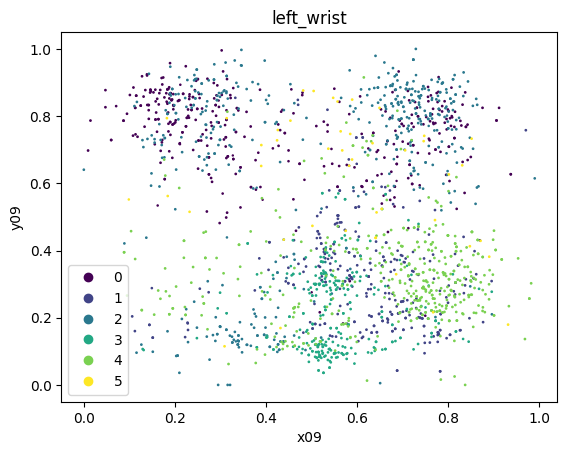

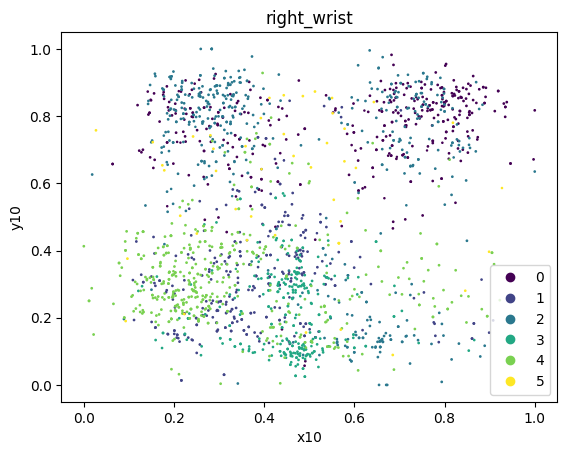

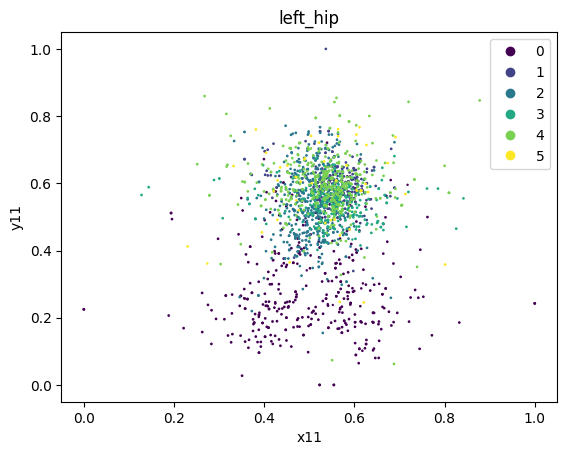

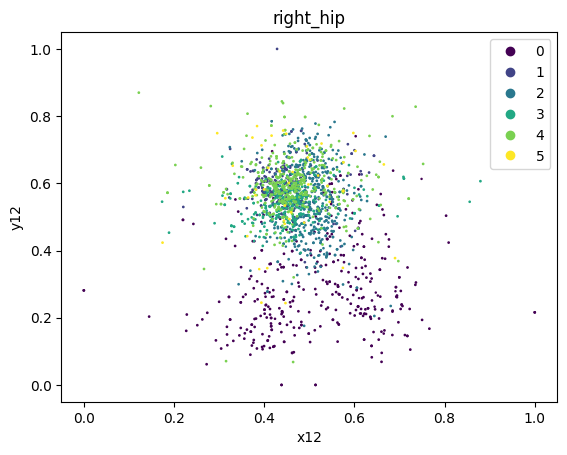

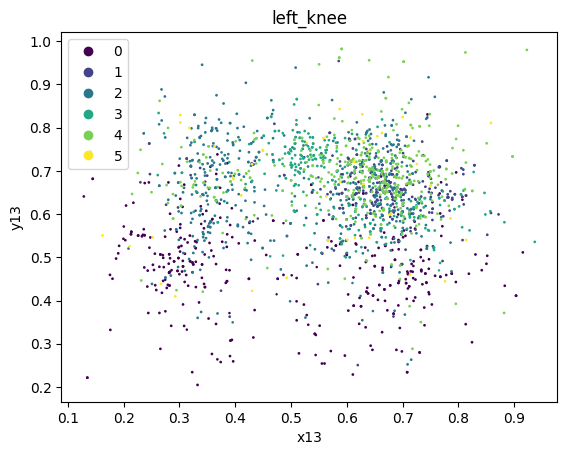

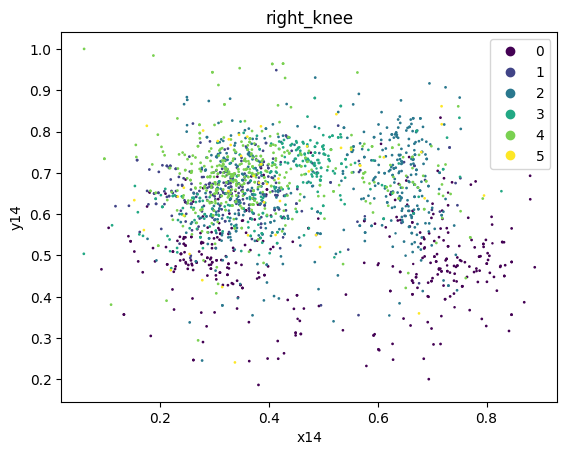

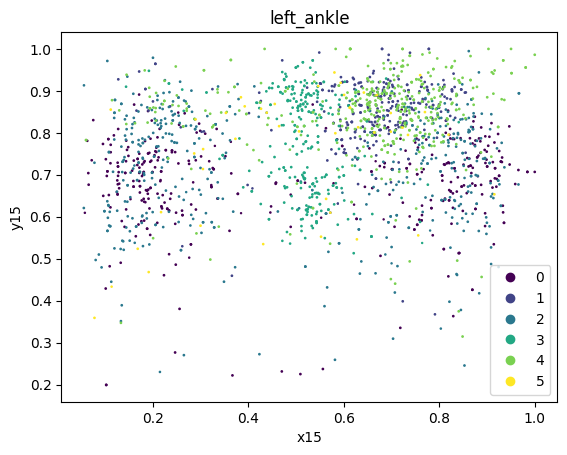

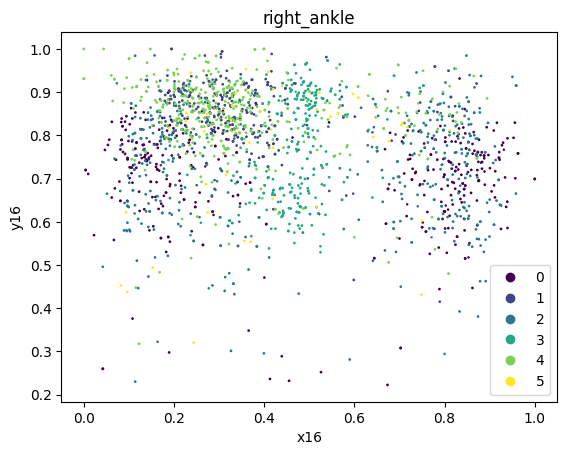

In [8]:
# Alle coördinaten in een scatterplot plaatsen met als kleur de pose en als grootte de confidence

coordinate_number = np.arange(0, 17, 1)

for i in coordinate_number:
    x_values = keypoints_train_df[x_coordinates_cols[i]]
    y_values = keypoints_train_df[y_coordinates_cols[i]]

    figure = plt.figure
    ax = plt.gca()
    scatter = ax.scatter(x_values, y_values, c=keypoints_train_df['pose_code'], s=keypoints_train_df['confidence'])
    ax.set_xlabel(x_coordinates_cols[i])
    ax.set_ylabel(y_coordinates_cols[i])
    ax.set_title("{} vs {}".format(x_coordinates_cols[i], y_coordinates_cols[i]))
    plt.title(x_coordinates_dict[x_coordinates_cols[i]])
    plt.legend(*scatter.legend_elements())
    plt.show()



#### Stap 2. Dataset verrijken
TO DO: ook voor de testdata

#### Toelichting data
Elke pose bevat 17 coördinaten. De betekenis van elke 'keypoint' is als volgt:
- 0: nose
- 1: left_eye
- 2: right_eye
- 3: left_ear
- 4: right_ear
- 5: left_shoulder
- 6: right_shoulder
- 7: left_elbow
- 8: right_elbow
- 9: left_wrist
- 10: right_wrist
- 11: left_hip
- 12: right_hip
- 13: left_knee
- 14: right_knee
- 15: left_ankle
- 16: right_ankle

### Additionele data

- Als een hand en een voet op de grond (1)
  - Als heup hoogste punt: downdog (2)
  - Als heup en schouders ongeveer even hoog: plank (3)
- Anders als grote afstand tussen hoofd en enkels (4)
   - Als voeten ver uit elkaar (5)
     - Als afstand tussen handen groot: warrior2 (6)
     - Als allebei de polsen gelijk aan of boven schouders: goddess (7)
   - Anders als enkels horizontaal gelijk & één enkel hoger dan de andere: tree (8)
- Anders: other


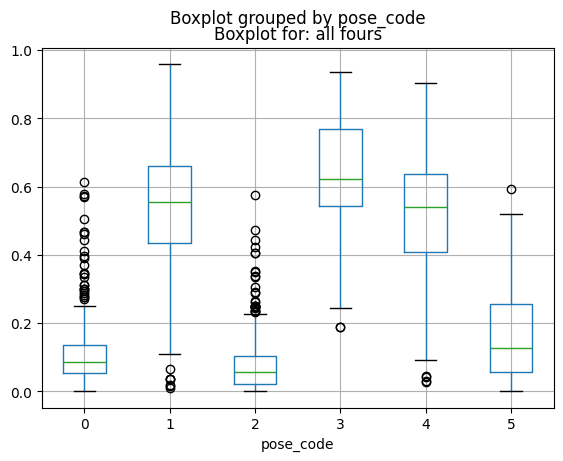

In [24]:
# 1
# Bepaal of iemand op 'all fours' (alle handen op de grond) is, of minimaal één hand en één voet
# Merk op: de grond betekent dat de y-waarde hoog (= bijna 1) is
# Er wordt daarom gekeken naar de maximale waarde van beide wrists en beide enkels
# Wanneer het verschil daartussen klein is, kun je stellen dat iemand minimaal een hand en een voet op de grond heeft
keypoints_train_df['all fours'] = abs(keypoints_train_df[['y09','y10']].max(axis=1) -
                                      keypoints_train_df[['y15','y16']].max(axis=1))

keypoints_train_df.boxplot('all fours', by='pose_code')
plt.title('Boxplot for: all fours')
plt.show()

In [25]:
treshold_1 = 0.39 # als waarde < 0.39: iemand staat niet dus pland of downdog

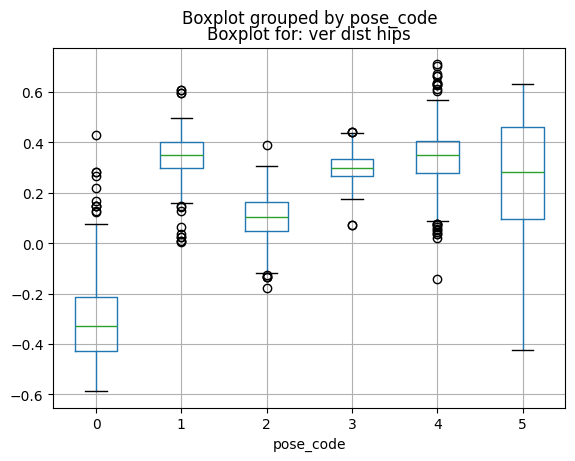

In [26]:
# 2
# Bepaal de afstand van de heupen tot het hoofd
# Bij downdog zullen de heupen het hoogste punt zijn en zal de afstand dus negatief zijn
# We nemen hier de hoogste heup (links of rechts) en het laagste punt van het gezicht
keypoints_train_df['ver dist hips'] = keypoints_train_df[['y11','y12']].min(axis=1) - \
                                      keypoints_train_df[['y00','y01','y02','y03','y04']].min(axis=1)

keypoints_train_df.boxplot('ver dist hips', by='pose_code')
plt.title('Boxplot for: ver dist hips')
plt.show()

In [27]:
treshold_2 = 0.2 # als waarde < treshold_2: downdog
treshold_3 = 0.1 # als waarde tussen -0.2 en 0.2: plank

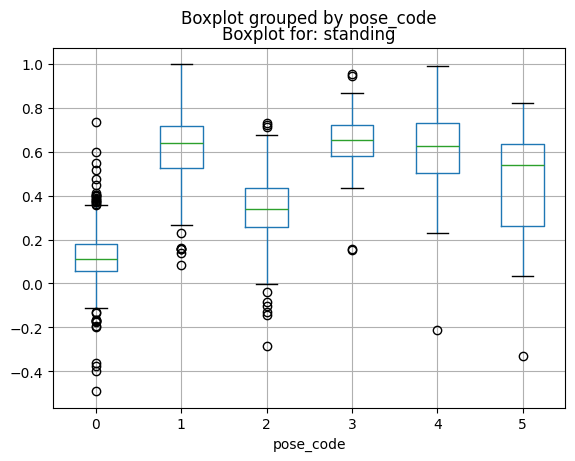

In [28]:
# 4
# Bepaal de afstand van de enkels tot het hoofd
# Hiermee kunnen we bepalen of iemand staat of niet
# We nemen hier de laagste enkel (links of rechts) en het laagste punt van het gezicht
keypoints_train_df['standing'] = keypoints_train_df[['y15','y16']].max(axis=1) - \
                                      keypoints_train_df[['y00','y01','y02','y03','y04']].min(axis=1)

keypoints_train_df.boxplot('standing', by='pose_code')
plt.title('Boxplot for: standing')
plt.show()

In [29]:
treshold_4 = 0.5 # Als waarde boven 0.5, dan staat iemand

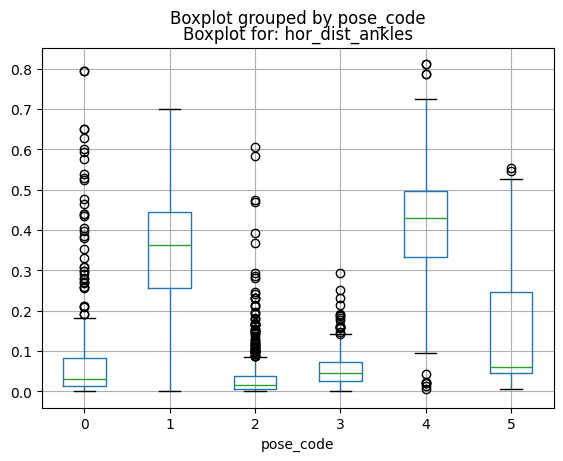

In [30]:
# 5
# Bepaal afstand tussen voeten
keypoints_train_df['hor_dist_ankles'] = abs(keypoints_train_df['x15'] - keypoints_train_df['x16'])

keypoints_train_df.boxplot('hor_dist_ankles', by='pose_code')
plt.title('Boxplot for: hor_dist_ankles')
plt.show()


In [31]:
treshold_5 = 0.25 # Als waarde > 0.25: dan staan voeten ver uit elkaar

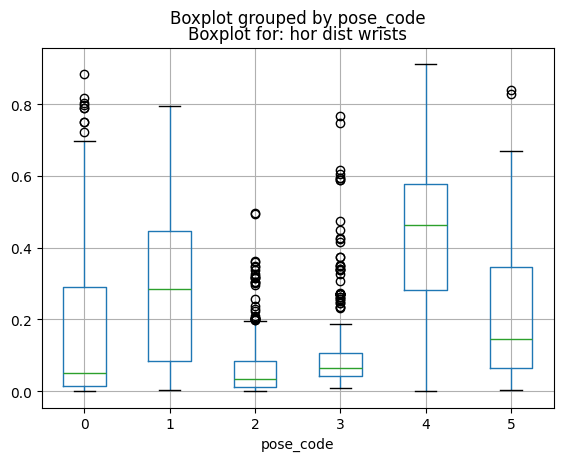

In [32]:
# 6
# Bepaal de horizontale afstand tussen de polsen
keypoints_train_df['hor dist wrists'] = abs(keypoints_train_df['x09']-keypoints_train_df['x10'])

keypoints_train_df.boxplot('hor dist wrists', by='pose_code')
plt.title('Boxplot for: hor dist wrists')
plt.show()

In [33]:
treshold_6 = 0.3 # als waarde > 0.2: warrior (gaat niet goed: ten onrechte goddess --> warrior2)

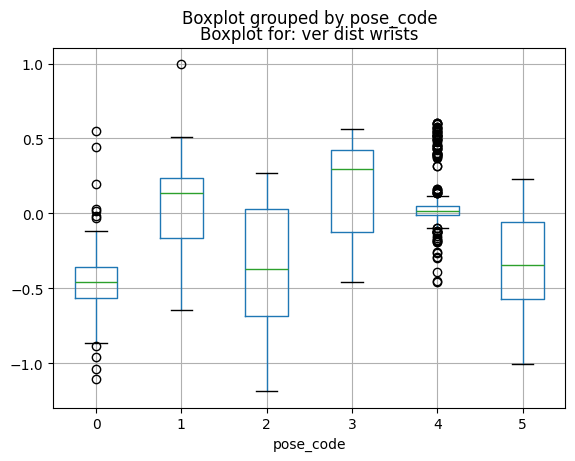

In [34]:
# 7
# Afstand tussen polsen (9 en 10) en schouders (5 en 6)
keypoints_train_df['ver dist wrists'] = (keypoints_train_df['y05'] - keypoints_train_df['y09']) + \
                                        (keypoints_train_df['y06'] - keypoints_train_df['y10'])

keypoints_train_df.boxplot('ver dist wrists', by='pose_code')
plt.title('Boxplot for: ver dist wrists')
plt.show()

In [35]:
# treshold_6 = -0.1 # als waarde hoger dan -0.1: goddess

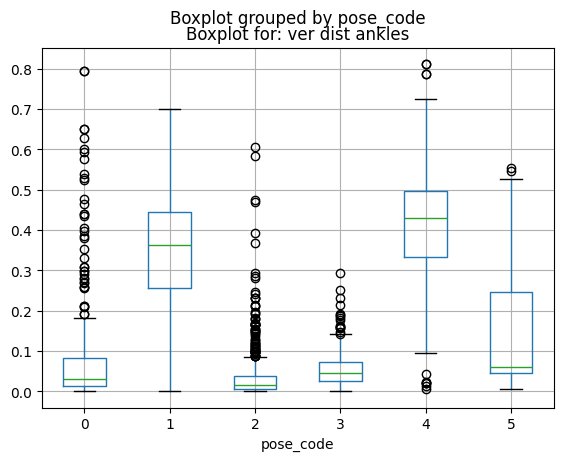

In [36]:
# 8
# Bepaal de verticale afstand tussen de voeten
keypoints_train_df['ver dist ankles'] = abs(keypoints_train_df['x15']-keypoints_train_df['x16'])

keypoints_train_df.boxplot('ver dist ankles', by='pose_code')
plt.title('Boxplot for: ver dist ankles')
plt.show()

In [37]:
treshold_8 = 0.1 # als waarde > 0.1, dan tree

In [38]:
keypoints_train_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,v14,v15,v16,all fours,ver dist hips,standing,hor_dist_ankles,hor dist wrists,ver dist wrists,ver dist ankles
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.934024,0.423500,0.709093,0.402510,0.702865,0.427802,0.704759,...,0.862971,0.845818,0.790219,0.084437,-0.477136,0.083704,0.008652,0.602298,-0.498172,0.008652
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.932599,0.336725,0.687173,0.331049,0.671780,0.337968,0.669529,...,0.940688,0.942040,0.897956,0.077501,-0.418508,0.184631,0.042990,0.003060,-0.673096,0.042990
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.936376,0.379543,0.704821,0.363566,0.690626,0.378991,0.699057,...,0.924674,0.896926,0.840897,0.102676,-0.399451,0.113263,0.030958,0.243853,-0.503882,0.030958
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.933815,0.616935,0.697705,0.620064,0.689498,0.625734,0.677587,...,0.967766,0.868041,0.914164,0.037754,-0.471743,0.237028,0.025091,0.000562,-0.672612,0.025091
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.898250,0.454746,0.786763,0.441597,0.773290,0.450748,0.781609,...,0.816905,0.630279,0.528475,0.088247,-0.199260,0.047326,0.024270,0.103216,-0.265029,0.024270


### Test aanvullen

In [41]:
keypoints_test_df = pd.read_csv('analytics_df_test_YOLOv8m.csv', index_col=0)
#keypoints_test_df = pd.read_csv('analytics_df_test_YOLOv8n.csv', index_col=0)
keypoints_test_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,v07,v08,v09,v10,v11`,v12,v13,v14,v15,v16
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.934335,0.513715,0.741517,0.497201,0.735360,0.509464,0.740671,...,0.928015,0.501971,0.819832,0.457138,0.937501,0.864479,0.939157,0.872600,0.846585,0.785794
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.932720,0.580441,0.789922,0.580974,0.787706,0.593028,0.778452,...,0.487198,0.958109,0.464756,0.877540,0.899801,0.966643,0.889800,0.956924,0.804400,0.881734
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.940483,0.646324,0.715999,0.652871,0.698378,0.652485,0.699054,...,0.876509,0.895218,0.811875,0.792492,0.979941,0.979246,0.982564,0.981466,0.954894,0.949070
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.946748,0.559559,0.754270,0.560810,0.757166,0.579860,0.739475,...,0.656251,0.934434,0.585341,0.839224,0.921909,0.962677,0.918488,0.955897,0.837674,0.884011
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,downdog,0,0.937118,0.349407,0.688239,0.341974,0.666379,0.346537,0.666175,...,0.952875,0.569137,0.872419,0.519962,0.975618,0.943836,0.977388,0.948830,0.951415,0.931818


In [42]:
keypoints_test_df['all fours'] = abs(keypoints_test_df[['y09','y10']].max(axis=1) -
                                      keypoints_test_df[['y15','y16']].max(axis=1))

keypoints_test_df['ver dist hips'] = keypoints_test_df[['y11','y12']].min(axis=1) - \
                                      keypoints_test_df[['y00','y01','y02','y03','y04']].min(axis=1)

keypoints_test_df['standing'] = keypoints_test_df[['y15','y16']].max(axis=1) - \
                                      keypoints_test_df[['y00','y01','y02','y03','y04']].min(axis=1)

keypoints_test_df['hor_dist_ankles'] = abs(keypoints_test_df['x15'] - keypoints_test_df['x16'])

keypoints_test_df['hor dist wrists'] = abs(keypoints_test_df['x09']-keypoints_test_df['x10'])

keypoints_test_df['ver dist wrists'] = (keypoints_test_df['y05'] - keypoints_test_df['y09']) + \
                                        (keypoints_test_df['y06'] - keypoints_test_df['y10'])

keypoints_test_df['ver dist ankles'] = abs(keypoints_test_df['x15']-keypoints_test_df['x16'])


#### Stap 3. Dataset exporteren

In [43]:
#keypoints_train_df.to_csv('keypoints_train_df_YOLOv8m.csv')
#keypoints_train_df.to_csv('keypoints_train_df_YOLOv8n.csv')
keypoints_test_df.to_csv('keypoints_test_df_YOLOv8m.csv')
#keypoints_test_df.to_csv('keypoints_test_df_YOLOv8n.csv')